# A geometric framework for multiclass ensemble classifiers
Shengli Wu · Jinlong Li · Weimin Ding <br>
[Link to paper](https://link.springer.com/article/10.1007/s10994-023-06406-w)

The paper focuses on the properties of and schemes for ensemble classifiers, with goal of developing a framework for general use, backed by empirical proofs like mathematical formulas and practical experiments.

Many studies have been conducted on ensemble learning investigating questions like how many component classfiers to use or how diverse should the classifiers be, however the results vary and further experiments sometimes do not support hypothesis. In addition there is no generally accepted definition of diversity(F-score, correlation coefficients etc.).

The major contribution of this paper is as follows:
1. A geometric framework is presented for ensemble classifiers.
2. An optimal weighting scheme is given for weighted majority voting.
3. A Euclidean distance-based measure of diversity is given. Unlike all other diversity
measures proposed so far, it is orthogonal to performance.
4. Experiments on twenty data sets validate the theory for practical use.

The following questions are answered:

1. _What is the difference between majority voting and weighted majority voting?_
   - In Majority voting all the component results are treated equally and the centroid is the solution, while in weighted majority voting the component results are not treated equally, a custom weight is assigned to each, which requires the extra challenge to find out the optimal weights.
2. _When should we use majority voting rather than weighted majority voting, or vice versa?_
   - Whenever majority voting doesn't give the best possible results (e.g., ensemble performance is worse than that of the the best component classifier) it is better to use weighted majority voting. Additionally theoretically weighted majority voting is always as good as majority voting should optimal weights are applied and Euclidean distance is used for performance evaluation.
   -  When all the component classifiers are of equal or very close performance, then majority voting may be able to achieve better ensemble performance than the best component classifier 
3. _There are a lot of weighting assignment methods for weighted majority voting, which
one is the best?_
   - Optimality is a complicated issue, as there are many different measures. The least squares is the best weighting assignment method for the measure of Euclidean distance. Compared with many others, it is efficient and effective at the same time. Almost all other weighting assignment methods are either heuristic or optimisation methods. For the former, its effectiveness is not guaranteed; for the latter, it is timing-consuming.
4. _How does the number of component classifiers affect ensemble performance?_
   - It always improves performance. If we assume the optimal weights are used with Weighted majority voting it holds straightforwardly true.
   - It may not always be the case with majority voting. From a group of candidates, to find a subset for best ensemble performance is a NP-hard problem (Theorem 3).
   - Many researchers find that if more base classifiers are combined, then the ensemble is able to achieve better performance. Although it is possible to achieve better performance by fusing more base classifiers, it costs more. Quite a few papers investigated the ensemble pruning problem that aims at increasing efficiency by reducing the number of base classifiers, without losing much performance at the same time. 
5. _How does each component classifier affect ensemble performance?_
   - For majority voting, each contributes equally. If many component classifiers are poor, then a few good ones may not be able to improve performance very much.
   - For weighted majority voting, each contributes differently in order to get the optimal results for the whole data set. If a very good component classifier is added, then weighted majority voting can take advantage of it.
6. _How does performance of component classifiers affect ensemble performance?_
   - Performance of component classifiers is the most important aspect that affect ensemble performance. For majority voting, a high-performance point is able to move the centroid of the group closer to the ideal point. For weighted majority voting, a high-performance point very likely enables the subspace to expand with some points closer to the ideal point.
7. _How does diversity of component classifiers affect ensemble performance?_
   - In this paper, diversity is defined as the dissimilarity distribution of all pairs of component results.
   - For majority voting the importance ratio between diversity and performance is calculated to be in the range of (0.25,0.5], varying with the number of component classifiers.
   - For weighted majority voting, high diversity among component results will make the subspace bigger, thus it is more likely to find closer points to the ideal point in such a space.
   - The advantage of the diversity measure defined in this paper is its orthogonality to performance, which makes its effect on ensemble performance very clear. It is also helpful when we try to select a subset of base classifiers from all available ones (classifier pruning (Mohammed et al., 2022)) for effective and efficient ensembling.

__Generalization of properties of an ensemble classifier__

In many papers the theorems hold for each individual instance, but it is unclear if they remain true for multiple instances collectively. The latter is a more important and realistic situation we should consider. As we know, a training data set or a test data set usually comprises a group of instances. It is desirable to know the collective properties of an ensemble classifier over all the instances, rather than that of any individual instance. This generalization is the major goal of this paper.

## Majority voting
In a n ∗ p-dimensional space, there are m points S={S1,S2,⋯,Sm} (m ≥ 2). Combining them by majority voting can be understood to be finding the centroid of these m points. It is referred to as the centroid-based fusion method in Wu and Crestani (2015).


__Theorem 1__
_In a geometric space X, there are m points S={S1, S2, ⋯ , Sm} (m ≥ 2). C is the centroid of these m points and O is the ideal point. The distance between C and O is no longer than the average distance between each of the m points and O:_
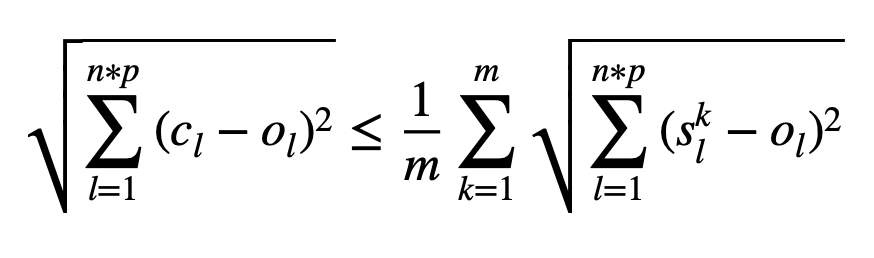

__Theorem 2__ 
_In a space X, suppose that S={S1, S2,⋯, Sm} and O are known points. C is the centroid of S1, S2,⋯, Sm. The distance between C and O can be represented as_
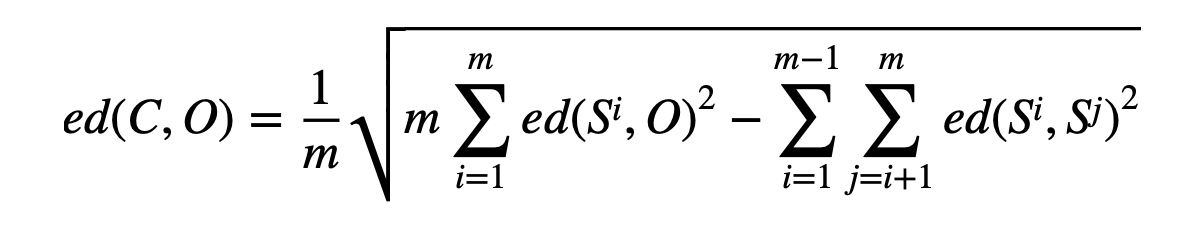
This theorem tells us that the ensemble performance is completely decided by ed(Si, O) (for
1 ≤ i ≤ m) and ed(Si, Sj) (for 1 ≤ i ≤ m, 1 ≤ j ≤ m, i ≠ j). The impact of both performance
of component classifiers and dissimilarity of all pairs of component classifiers on ensemble
performance can be seen clearly. According to Theorem 2, in order to minimize ed(C, O), we
need to minimize ∑m ed(Si, O)2 and maximize ∑m−1 ∑m ed(Si, Sj)2 at the same time. i=1 i=1 j=i+1
Therefore, for performance distribution, both average and variance affect ensemble performance. Lower average and lower variance lead to better performance. For dissimilarity distribution, both average and variance also affect ensemble performance. Higher average and higher variance lead to better performance.

_Example_ In the figure below, there are six points Si (1 ≤ i ≤ 6). Among these points, S1 is the closest to O. It is followed by S2 and S3, which are equally distant to O. Finally, S4, S5 and S6 are equally distant to O and they are all further from O than the other three points. Now we try to work out a subset of these to maximize performance. <br>
![image.png](attachment:bac7358c-55d7-4228-b95b-869b7238f543.png) <br>
Now, if we select one point only, then S1 is the best option; if we select two points, then combining S2 and S3 is the best option, in this instance the centroid would be C2; if we select three points, then combining S4, S5 and S6 is the best option, this gives the centroid O. Fusing all six points is also a good option, but it may not be as good as fusing S4, S5 and S6. The “many-could-be-better-than-all” theorem seems reasonable (Zhou et al., 2002) in this case. Because the centroid of a group of points is decided by the positions of all the points collectively, each of which has an equal weight, removing or adding even a single point may change the position of the centroid of a group of points significantly. It also indi- cates that it is not an easy task to find the best subset from a large group of base classifiers. As a matter of fact, it is an NP-hard problem, as our next theorem proves. 

__Theorem 3__ _S = {S1, S2,⋯, Sm} for (m ≥ 3) is a group of points and O is an ideal point. For a given number m′ (2 ≤ m′ < m), the problem is to find a subset of m′ points from S to minimize the distance of the centroid of these m′ points to the ideal point O. The above question is NP-hard._


Now let us have a look at how the size of the ensem- ble impacts its performance. Because the performance of an ensemble is affected by a few different factors, we need to find a way of separating this from other factors.

__Theorem 4__ _In a space X, S = {S1, S2, ⋯ , Sm} and O are known points. C is the centroid of S1, S2, ⋯ , Sm, C1 is the centroid of m − 1 points S2, S3, ⋯ , Sm, C2 is the centroid of m − 1 points S1, S3, ⋯ , Sm,⋯, Cm is the centroid of m − 1 points S1, S2, ⋯ , Sm−1. We have_
![image.png](attachment:1364b16e-5d93-4069-aac3-1e87f07181b3.png)

Theorem 4 can be used repeatedly to prove more general situations in which a sub- set includes m − 2,m − 3,⋯,or 2 points. This demonstrates that the number of component results has a positive effect on ensemble performance.

Figure below shows the values of ed(C, O) in cp unit for 𝜃=0.25,0.5,0.75,1 and m = 2, 3, ⋯ , 100. From Fig. 1 we can see that in all four cases, ed(C, O) decreases with m. However, as m becomes larger and larger, the rate of decrease becomes smaller and
smaller. It suggests that fusing 30 or more component results may not be very useful for further improving ensemble performance. This has been observed in some empirical studies before, such as in Oshiro et al. (2012), and others.
![image.png](attachment:51a91675-5287-43b9-aa35-448dcae18e4a.png)

Theorem 1 tells us that the ensemble performance is at least as good as the average performance of all the component classifiers involved. This may not be positive enough for many applications of the technique. Theorem 3 indicates that it may take too much time to choose a subset from a large group of candidates for good ensemble perfor- mance. This problem may be solved in other ways. In particular, if we want the ensem- ble performance to be better than the best component classifier, more favorable condi- tions are required for those component classifiers. It means that we need to apply some restrictions to all the component classifiers involved. Theorem 5 can be useful for this.

   __Theorem 5__ _In a space X, S = {S1, S2,⋯, Sm} and O are known points. At least one of the points in S is different from the others. C is the centroid of S1, S2,⋯, Sm. If ed(S1, O) = ed(S2, O) = ⋯ = ed(Sm, O), then ed(C, O) < ed(S1, O) must hold._

Theorem 5 tells us if all the component classifiers are equally effective, then majority voting is able to do a better job than Theorem 1’s guarantee. In practice, this has been implemented in various situations. For example, if using bagging with random forest or neural networks (Oshiro et al., 2012; Yang et al., 2013), then we are can generate a large number of almost equally-effective component classifiers. Good performance is achiev- able by fusing such classifiers.

## Weighted majority voting

__Theorem 6__ _In a n ∗ p dimensional space X, S={S1, S2,⋯, Sm} and O are known points. If every point in S is linearly independent from the others, then the above process and equation below can find the unique solution to the problem._
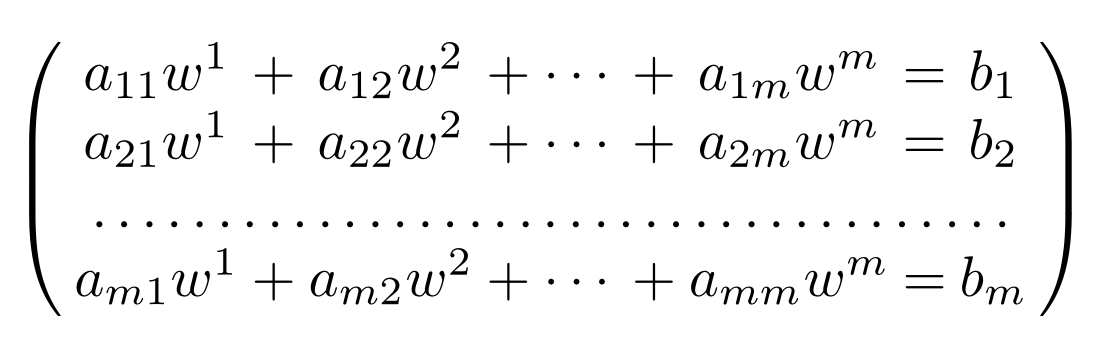

Theorem 6 can be explained as follows. For a (training) dataset with n instances, p classes, and m classifiers, each of the classifiers gives a score for each instance and each class. For each instance, we also have real labels relating to all the classes. Then we are able to find a group of weights w1, w2, ⋯ , wm for S1, S2,⋯, Sm to achieve the best ensem- ble performance by weighted majority voting.

__Theorem 7__ _In a n ∗ p dimensional space X, S1={S1, S2,⋯, Sm}, S2={S1, S2,⋯, Sm, Sm+1}, and O is an ideal point. If the optimum weights are used for both S1 and S2, then the per- formance of Group S2 is at least as effective as that of Group S1._

__Corollary 7.1__ In a n ∗ p dimensional space X, assume that weighted majority voting is applied with the optimum weights. When more and more points are added, the ensemble performance is monotonically non-decreasing.

## Empirical investigation

The theoretical conclusions presented above are investigated for practical use. All the theorems hold perfectly when Euclidean distance is used as performance metric on the same dataset. In this investigation we see how they behave when the conditions are partially satisfied, specifically:
 -  We are going to see how the newly proposed optimal scheme is related to two typical weighting schemes proposed before. We also compare their performance and efficiency through experiments.
    - Stacking with MLR (Ting & Witten, 1999)
    - Stacking C with MLR (Seewald, 2002)
    - ED with MLR
 - Usually classification accuracy or some other metrics, rather than Euclidean distance, is used for performance evaluation. We'll see the correlation between the Euclidean distance and other commonly used metrics.


### Method
Three weighting schemes are investigated including Stacking, StackingC, and ED. 
- 26 datasets, downloaded from the UCI Machine Learning Repository, are used for this. The main statistics of the these 26 datasets are listed in _Table 6_. These datasets vary in number of instances, features, and classes.
- Three types of base classifiers, including decision tree, support vector machine, and logistic regression-based classifiers, were involved for the ensemble.
- For each dataset, we divided it into five equal subsets. All the instances were randomly allocated to each subset. Two of the subsets were used to generate base classifiers, another two were used to train weights for the ensemble, and the remaining one were used for testing. All 30 different combinations were tried. 
- We repeat the above process 20 times for each dataset, in order to reduce the impact of randomness of selection. The results are shown in Table 7. The figure is the average over 20 iterations and 30 combinations for each dataset.

### Performance and efficiency results

From Table 7 we can see that StackingC and ED are close in performance, while Stacking is not as good as the others. However, the difference between them is small and not significant if we consider all the cases together. In one of the datasets (Ba), all four weighting schems equally-performed. Out of the remaining 25 datasets, majority-voting wins eight of them. Stacking, StackingC, and ED are winners in 4, 8, and 10 datasets, respectively. Note that in two datasets Ca and Pe, these three are joint winners; and in one dataset An, Stacking and StackingC are joint winners.

In some cases, weighted ensemble does not perform as good as simple majority-voting. This happens when the condition is unfavorable to weighted ensemble. If all the base classifiers are close in performance, then it is harder for weighted ensemble to beat majority-voting. Therefore, we measured the performance of base classifiers and calculated the difference ratio of the best and worst R. Two groups are formed based on the difference (10% as the threshold). If only considering one group of 16 datasets in which R>10% (labelled “yes” in the column “R>10%” in Table 7), we find that the difference between Stacking and StackingC, and Stacking and ED is significant (paired-samples T test, two-sided, 0.010 and 0.008 respectively); while the difference between StackingC and ED is 0.055, just out of the signicance level of 0.05.

 __The time required for the training__ of these three weighting schemes was also measured. A personal desk computer with an i7-11700 CPU and 16 G RAM was used. Table 8 shows the results on seven selected datasets. All three methods run very fast. Understanably, ED is the fastest, Stacking is the slowest, while StackingC is in the middle. When a dataset has a small number of instances and a small number of classes, their difference is also small. This is the case for Ba, Ca, De, En, and GL. When a dataset has a larger number of classes, their difference becomes larger. Pe has over 10,000 instances and 10 classes, and So only has 683 instances but relatively a large number of 18 classes. So the time difference between Stacking and ED is over 8 times for Pe (Pen-Based Recognition) and 18 times for So (Soybean).

### Metrics correlation results
Here under investigation is the strength of correlation between Euclidean distance and other commonly used metrics.
In fact, Euclidean distance and all other reasonable metrics are directly related to probability scores. Considering one instance in a binary classification problem, a distance of below 0.5 always means a wrong classification, while a distance of above 0.5 alway means a correct classification. Therefore, an observable property of Euclidean distnace is: it is more sensitive to the change of probability scores than all other metrics. However, if a larger number of instances are considered together, we can expect a stronger (either negative or positive) correlation between Euclidean distance and other metrics such as precision and recall.

For all the instances in a dataset, we divide them into two equal partitions by selecting instances randomly. One partition is used to train a group of classifiers. Then we evaluate all the instances in the other partition by a few different metrics including Euclidean distance. Finally, the correlation between different metric pairs are calculated. The roles of training and testing are exchanged for the two partitions.

Two types of classifiers, decision tree-based (20) and support vector machine-based (20), were generated. To increase the diversity of those classifiers generated, different settings were tried. Rather than using all the features, we randomly selected a subset (2/3) of all the features. we also set different values for a few parameters including criterion and maximum depth (for CART decision trees), and kernel and gamma (for SVMs).

Apart from Euclidean distance, Accuracy, Precision, Recall, and F1 are invovled. All the 26 datasets in Table 6 are also used in this experiment. For each dataset, we repeated the above-mentioned process 20 times. Table 9 presents the Pearson correlation coefficients between each pair of those five metrics.

From Table 9, we can see that the correlation between all those pairs are very strong in most cases. In 12 datasets, the correlation coefficients are always above 0.9 for all different metric pairs. In a few datasets, the corrlelation is relatively weaker. The weakest is 0.56 (P &E in Ly). In general, it demonstrates that Euclidean distnace has strong correlation with all four metrics considered in the experiment. Therefore, we conclude that in general, the theorems we obtain from the geometric framework still make sense even when other metrics such as Accuracy is used for performance evaluation.



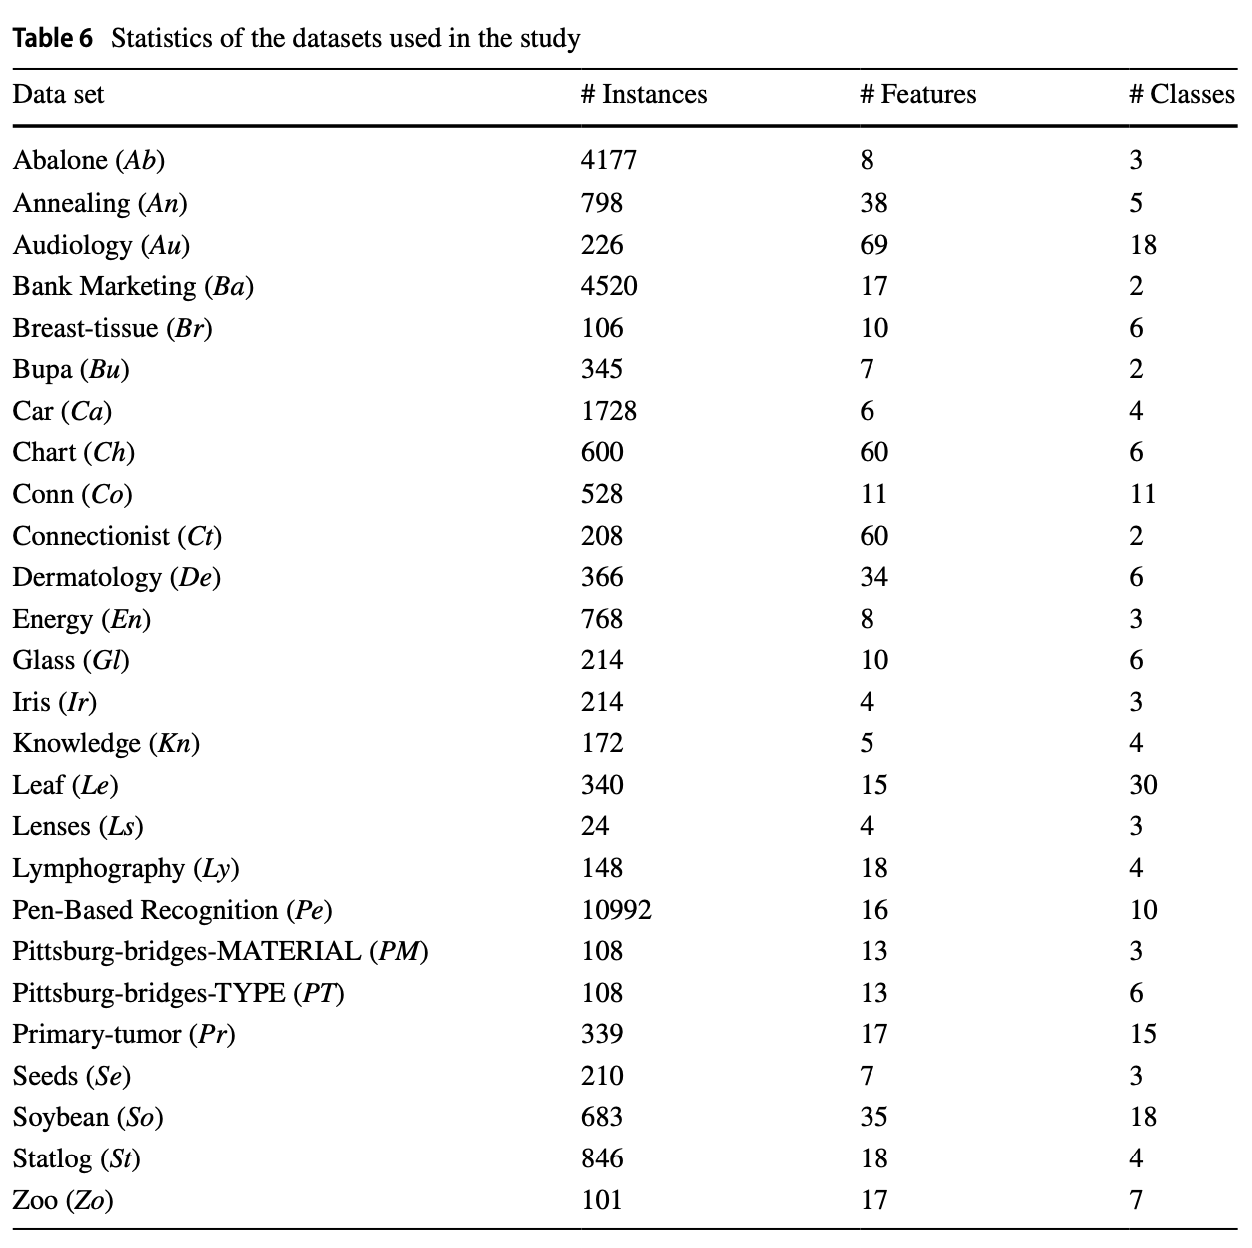
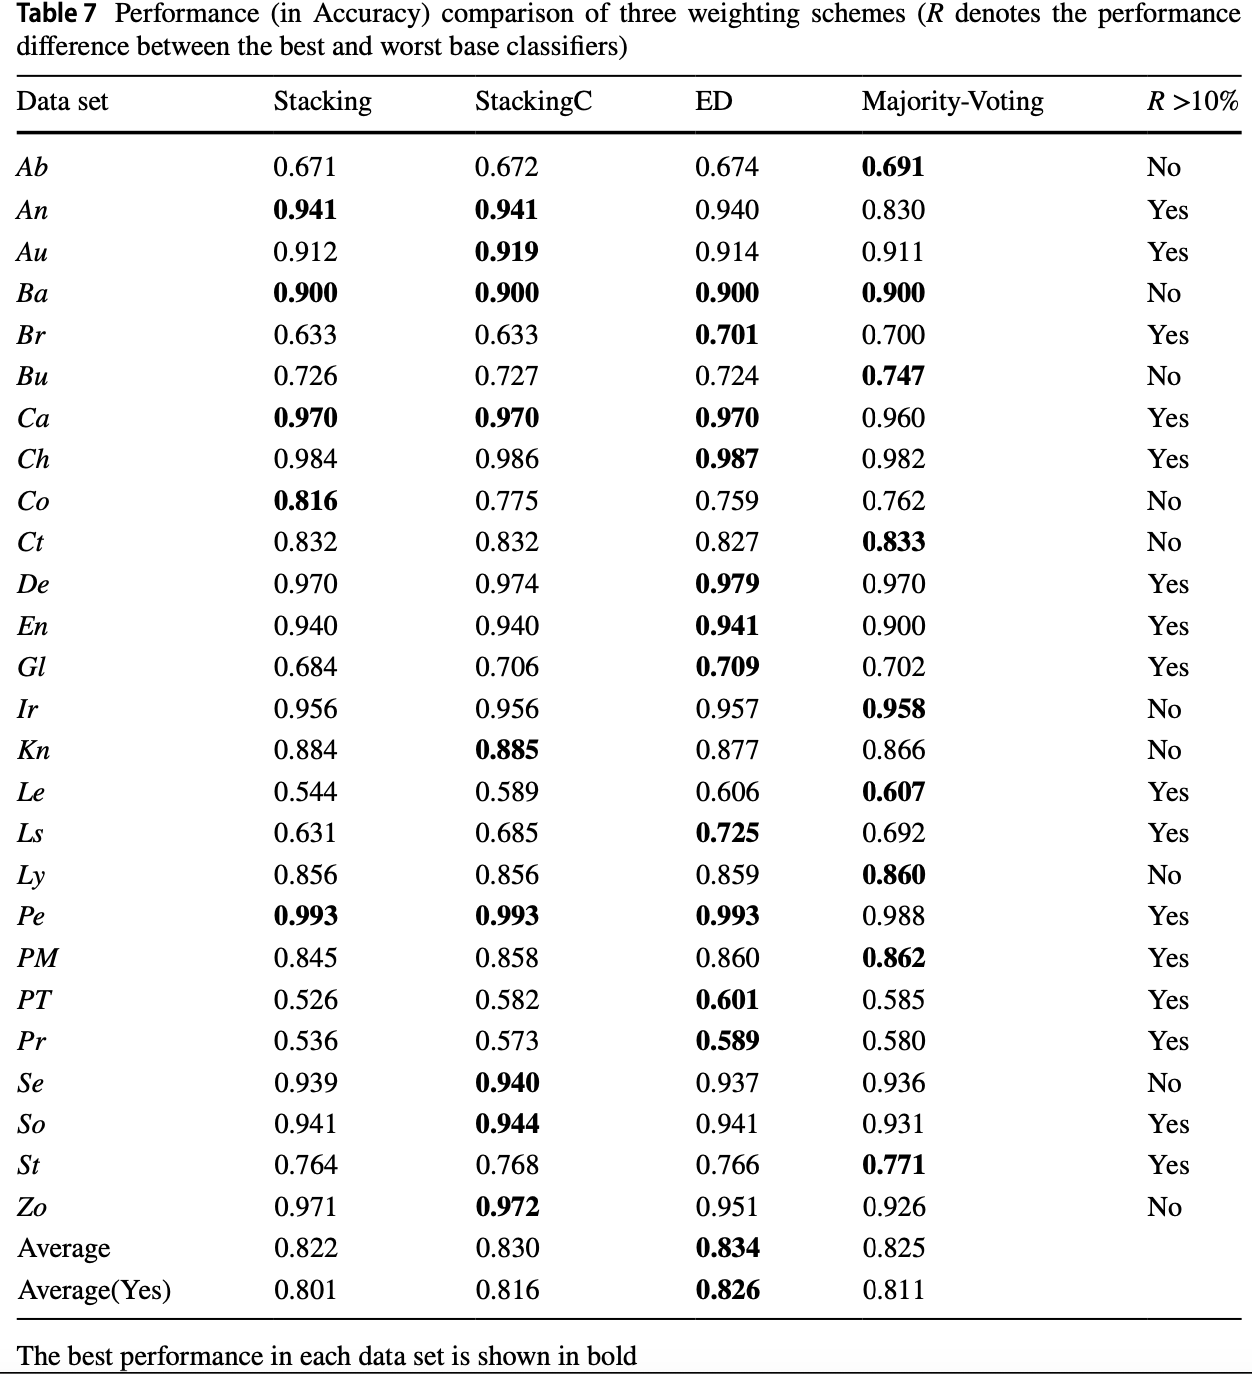
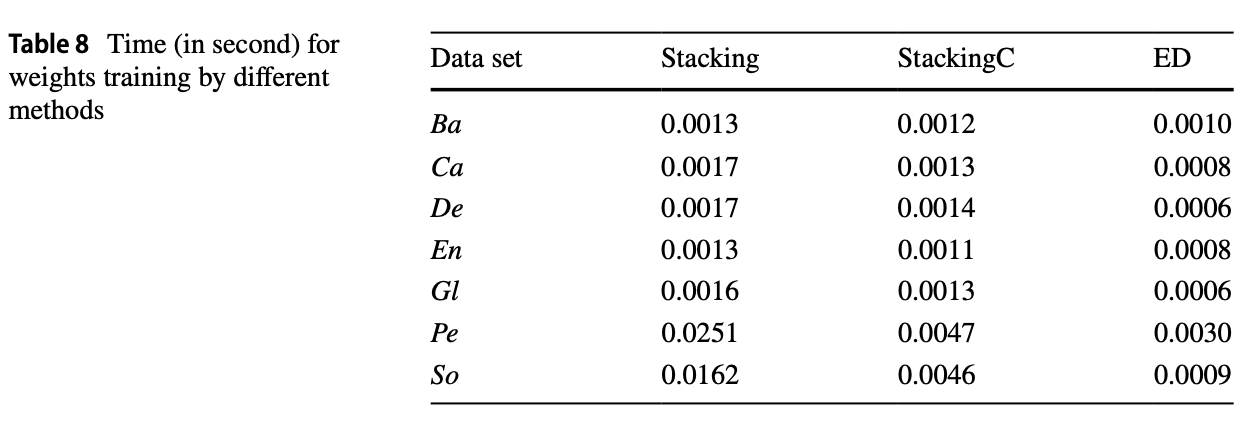
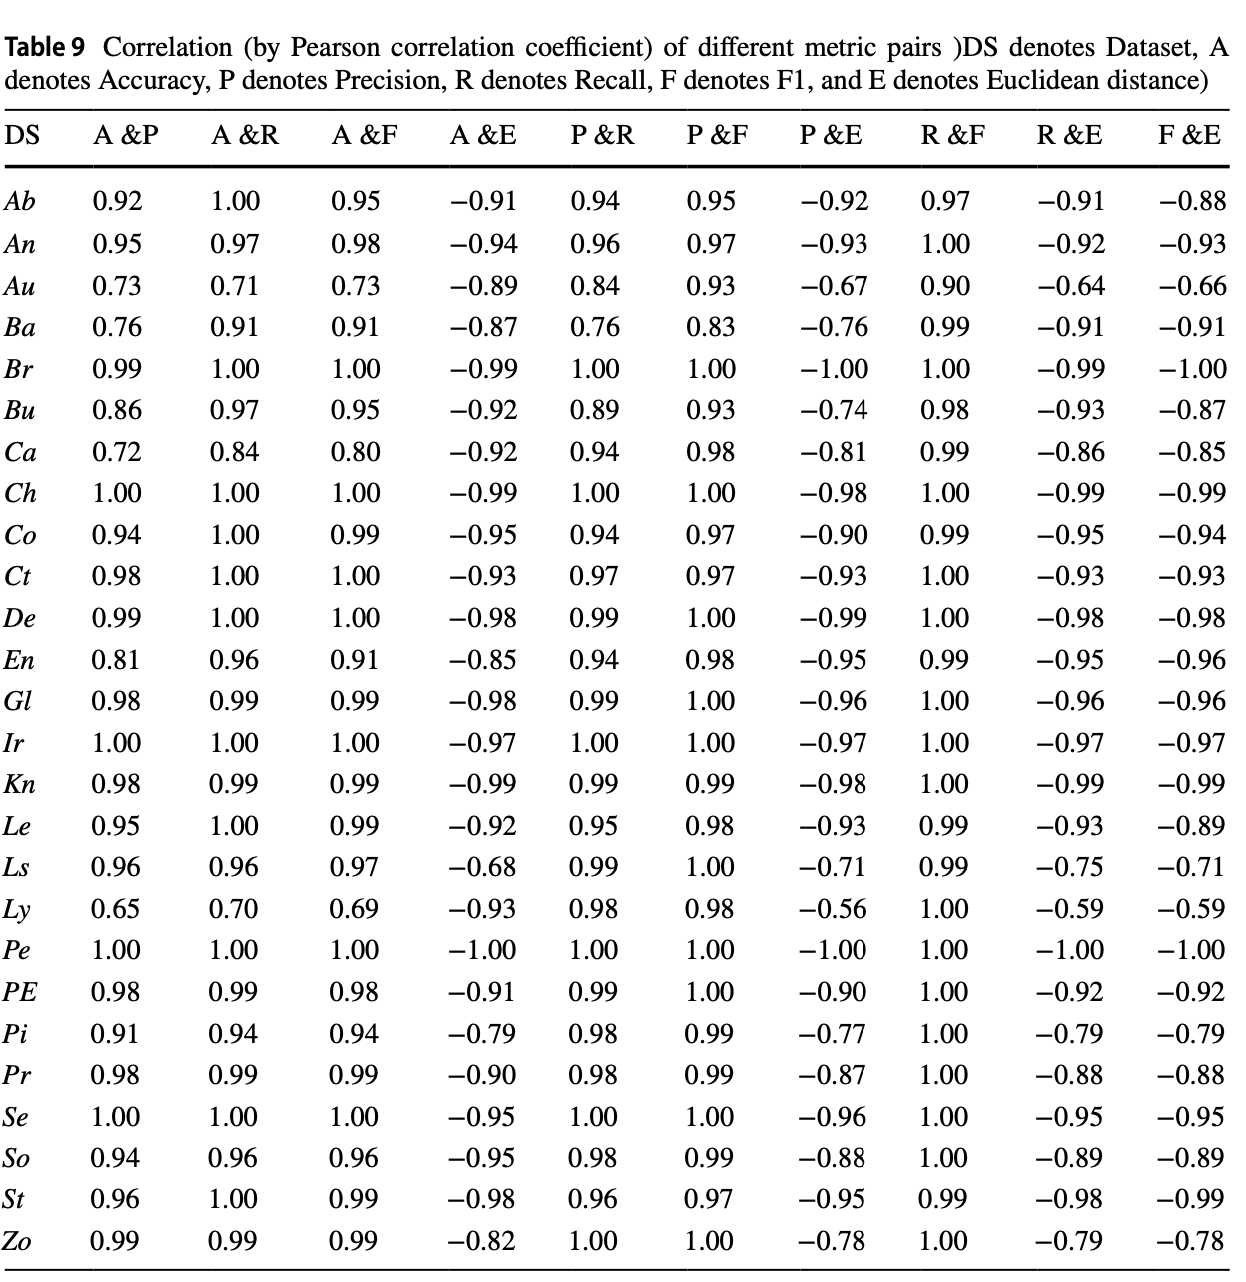

## Conclusion

This paper provides some general guidelines for ensembling classifiers by investigating their properties. The dataset level approach maps the ensemble classifier problem for a whole dataset into one multi-dimensional space, thus it is more convenient for us to investigate the properties of ensembles. Eclidean distance is used for measurement. Thanks to that we can present by a mathematical equation the exact relationship between ensemble performance and two major factors including all base classifiers’ performance and diversity of the group, thus the profitability of ensembling a group of base classifiers can be calculated out very quickly. Some issues of ensemble classifiers are the impact of multiple aspects on ensemble performance, predicting ensemble performance, selecting a small number of base classifiers to get efficient and effective ensembles, etc. 
Additionally the experimental results show that the theorems from this paper are still meaningful for metrics other than the Euclidean Distance.

# Accuracy and execution efficiency reproduction

In [1]:
"""
执行代码，输入数据集csv文件路径，准确度与时间开销结果输出在末尾
"""
import numpy as np
import pandas as pd
import time
import os
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from mlxtend.feature_selection import ColumnSelector
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import itertools
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
# one-hot 编码
def getOneHot(y, category):
    #将y转换成one-hot编码
    num_class = category
    ohy = np.zeros((len(y), num_class))
    #ohy变为n1*p维向量 
    ohy[range(len(y)), y.ravel()] = 1
    return ohy

#过滤掉小于阈值的类别
def filter_by_class_size(X, y, threshold):
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    df = pd.concat([X, y], axis=1)
    class_counts = df.iloc[:, -1].value_counts()
    minority_classes = class_counts[class_counts < threshold].index
    filtered_df = df[~df.iloc[:, -1].isin(minority_classes)]
    return filtered_df.iloc[:, :-1].values, filtered_df.iloc[:, -1].values

# 数据概率化--[0~1]
def normalize(data):
    return abs(data) / np.sum(abs(data),axis=1).reshape(-1,1)

In [3]:
#基分类器分类准确度
def get_base_predict(X, y, model_set):
    Accscore = []
    y_pred = []
    for model in model_set:
        y_pred.append(model.predict_proba(X))
        Accscore.append(accuracy_score(model.predict(X), y))
    return Accscore

In [4]:
#欧氏距离计算
def Euclidean(X_train_weight,y_train_weight,X_test,y_test,model_Set):
    m = 3   #分类器个数
    res_all_set = []
    train_weight_prediction_proba = []
    # 训练集上的预测概率
    train_weight_prediction_proba = [pd.DataFrame(model.predict_proba(X_train_weight)) for model in model_Set]
    y_train_weight_oh = getOneHot(y_train_weight, category)
    # 测试集上的预测概率
    test_prediction_proba = [pd.DataFrame(model.predict_proba(X_test)) for model in model_Set]
    y_test_oh = getOneHot(y_test, category)
       
    train_weight_prediction_proba_matrix = np.stack(train_weight_prediction_proba, axis=0) # shape: (M, N, P)
    y_train_weight_oh_matrix = np.stack(y_train_weight_oh, axis=0) # shape: (M, N, P)
    ## 数据准备阶段 完毕  
    ## ----------此处开始计算时间----------
    start_time = time.perf_counter()
    
    res_all_set = []
    for i in range(m):
        a_ij = np.sum(train_weight_prediction_proba_matrix * train_weight_prediction_proba_matrix[i], axis=(1,2)) # shape: (M,)
        b_i = np.sum(y_train_weight_oh_matrix * train_weight_prediction_proba_matrix[i], axis=(0,1)) # shape: (M,)
        res_all_set.append((a_ij, b_i))
        
    a = np.stack([res_all_set[i][0] for i in range(m)], axis=1) # shape: (M, M)
    b = np.stack([res_all_set[i][1] for i in range(m)], axis=0) # shape: (M, 1)
    w = LinearRegression(fit_intercept=False).fit(a,b).coef_
    # 权重归一
    ww = w / sum(w)
    
    addw_pred_test = np.sum(
        [ww[0]*test_prediction_proba[0], ww[1]*test_prediction_proba[1],
         ww[2]*test_prediction_proba[2]],axis=0)
    
    y_hat_test = np.argmax(addw_pred_test, axis=1)
    
    test_score = accuracy_score(y_test,y_hat_test)
    
    ## ----------此处结束计算时间----------
    end_time = time.perf_counter()
    timekeeping_E.append(end_time - start_time)
    
    return test_score

#平均权重计算
def averageWeight(X_train_weight,y_train_weight,X_test,y_test,model_Set):
    w = [1/3.0,1/3.0,1/3.0]
     # 训练集上的预测概率
    train_weight_prediction_proba = [pd.DataFrame(model.predict_proba(X_train_weight)) for model in model_Set]
    test_prediction_proba = [pd.DataFrame(model.predict_proba(X_test)) for model in model_Set]
    
    addw_pred_train = np.sum(
        [w[0]*train_weight_prediction_proba[0], w[1]*train_weight_prediction_proba[1],
         w[2]*train_weight_prediction_proba[2]],axis=0)
    addw_pred_test = np.sum(
        [w[0]*test_prediction_proba[0], w[1]*test_prediction_proba[1],
         w[2]*test_prediction_proba[2]],axis=0)
    
    y_hat_train = np.argmax(addw_pred_train, axis=1)  
    y_hat_test = np.argmax(addw_pred_test, axis=1)
    
    train_score = accuracy_score(y_train_weight,y_hat_train)
    test_score = accuracy_score(y_test,y_hat_test)
    
    return train_score,test_score


#简单权重表计算
def simple_computer_weight(X_train_weight,y_train_weight,X_test,y_test,model_Set): 
    train_weight_prediction_proba = []
    test_prediction_proba = []
    
    for model in model_Set:
        train_weight_prediction_proba.append(pd.DataFrame(model.predict_proba(X_train_weight)))
        test_prediction_proba.append(pd.DataFrame(model.predict_proba(X_test)))
    
    y_train_weight_oh = getOneHot(y_train_weight, category).reshape(-1,1)
    y_test_oh = getOneHot(y_test, category).reshape(-1,1)
    
    train_weight_stack = np.hstack([proba.values.reshape(-1, 1) for proba in train_weight_prediction_proba])
    test_stack = np.hstack([proba.values.reshape(-1, 1) for proba in test_prediction_proba]) 
    
    lr_final = LinearRegression(fit_intercept=False).fit(train_weight_stack, y_train_weight_oh)
    coef = lr_final.coef_[0]
    intercept = lr_final.intercept_
    # 权重归一
    ww = np.zeros(3)
    ww[0] = coef[0]/sum(coef)
    ww[1] = coef[1]/sum(coef)
    ww[2] = coef[2]/sum(coef)
    
    train_score,addw_pred_train = calcSW_accuracy(ww, intercept, train_weight_stack, y_train_weight)
    test_score,addw_pred_test = calcSW_accuracy(ww, intercept, test_stack, y_test)
    return train_score,test_score

def calcSW_accuracy(coef, intercept, prova, y):
    arr = prova.dot(coef) + intercept
    tmparr = np.split(arr, len(y))
    # list 转为numpy数组
    tmparr = np.array(tmparr)
    # 概率化处理
    tmparr = normalize(tmparr)
    max_index = np.argmax(tmparr, axis=1)
    return accuracy_score(max_index, y),tmparr

In [5]:
# oneVsOthers StackingC
def StackingC(X, y, X_test,y_test):   
    n_classifiers = 3
    n_features = X.shape[1]
    n_classes = int(n_features/n_classifiers)
    cols = np.array(range(n_features)).reshape(n_classifiers, n_classes).T
    XL = []
    XLT = []
    # for each column index in cols, create a ColumnSelector and fit_transform X
    XL = [ColumnSelector(cols=c).fit_transform(X) for c in cols]
    XLT = [ColumnSelector(cols=c).fit_transform(X_test) for c in cols]
    coef = np.zeros((n_classes, 3))  # 分类器个数==coef个数
    intercept = np.zeros(n_classes)   
    
    ## ----------此处开始计算时间----------
    start_time = time.perf_counter()
    
    for i in range(n_classes):
        # create a new label vector where the current class is 1 and the rest are 0
        y_bin = np.where(y == i, 1, 0)
        lr = LinearRegression()
        lr.fit(XL[i], y_bin)        
        # store the coefficients and intercepts of the model in the arrays
        coef[i] = lr.coef_
        intercept[i] = lr.intercept_
    n_samples, n_features = X_test.shape    
    # create an array to store the probabilities of each class for each sample
    prob = np.zeros((n_samples, n_classes))    
    for i in range(n_classes):
        z = XLT[i].dot(coef[i]) + intercept[i]
        prob[:, i] = z     
    ans = np.argmax(prob, axis=1)
    y_pred_test = accuracy_score(ans, y_test)    
    ## ----------此处结束计算时间----------
    end_time = time.perf_counter()
    
    timekeeping_SC.append(end_time - start_time)
    return y_pred_test

In [6]:
# oneVsOthers Stacking
def Stacking(X, y, X_test,y_test):
    n_classifiers = 3
    n_features = X.shape[1]
    n_classes = int(n_features/n_classifiers)
    coef = np.zeros((n_classes, n_features))
    intercept = np.zeros(n_classes)
    
    ## ----------此处开始计算时间----------
    start_time = time.perf_counter()
    
    for i in range(n_classes):
        y_bin = np.where(y == i, 1, 0)
        lr = LinearRegression()
        lr.fit(X, y_bin)
        coef[i] = lr.coef_
        intercept[i] = lr.intercept_
    n_samples, n_features = X_test.shape    
    prob = np.zeros((n_samples, n_classes))    
    for i in range(n_classes):
        z = X_test.dot(coef[i]) + intercept[i]
        prob[:, i] = z
        
    ans = np.argmax(prob, axis=1)
    y_pred_test = accuracy_score(ans, y_test)
    ## ----------此处结束计算时间----------
    end_time = time.perf_counter()
    
    timekeeping_S.append(end_time - start_time)
    return y_pred_test

In [7]:
def Stacking_predict(X_train,y_train,X_test,y_test,clf):
    b1_train = clf[0].predict_proba(X_train)
    b2_train = clf[1].predict_proba(X_train)
    b3_train = clf[2].predict_proba(X_train)
    b_train = np.concatenate((b1_train, b2_train, b3_train), axis=1)

    b1_test = clf[0].predict_proba(X_test)
    b2_test = clf[1].predict_proba(X_test)
    b3_test = clf[2].predict_proba(X_test)
    b_test =  np.concatenate((b1_test, b2_test, b3_test), axis=1)

    # 返回预测结果
    y_pred_test = Stacking(b_train,y_train,b_test,y_test)  
    
    return (y_pred_test)

def StackingC_predict(X_train,y_train,X_test,y_test,clf):
    b1_train = clf[0].predict_proba(X_train)
    b2_train = clf[1].predict_proba(X_train)
    b3_train = clf[2].predict_proba(X_train)
    b_train = np.concatenate((b1_train, b2_train, b3_train), axis=1)

    b1_test = clf[0].predict_proba(X_test)
    b2_test = clf[1].predict_proba(X_test)
    b3_test = clf[2].predict_proba(X_test)
    b_test =  np.concatenate((b1_test, b2_test, b3_test), axis=1)

    # 返回预测结果
    yC_pred_test = StackingC(b_train,y_train,b_test,y_test)
    
    return (yC_pred_test)

In [8]:
#数据录入
try:
    url = input("请输入一个以CSV为后缀的文件路径：")  #此处为输入数据集的路径url
    if not url.endswith(".csv"):
        raise ValueError("输入的文件名不是CSV格式")

    if not os.path.isfile(url):
        raise FileNotFoundError("找不到该文件")
             
    df = pd.read_csv(url,header=None)

    X = df.iloc[:, 1:].values
    y = df.iloc[:, 0].values

    #过滤掉过少的类别
    X, y = filter_by_class_size(X, y, 2)
    #对y重新编号
    y = pd.factorize(y)[0]

    category = np.unique(y).size   #y的类别数
    sample_num = y.shape[0]  # 样本总数
    # pd.DataFrame(y).value_counts()

except (ValueError, FileNotFoundError) as e:
    print("出现错误：", e)

请输入一个以CSV为后缀的文件路径： /Users/aysun/Desktop/Deep learning/ensemble_classfier/ensemble_class/car.csv


In [9]:
timekeeping_E = []
timekeeping_S = []
timekeeping_SC = []
# loop20
loop20_base_predict_test = []
loop20_Euclidean_predict = []
loop20_simple_weight_predict = []
loop20_averageWeight_predict = []
loop20_S_predict = []
loop20_SC_predict = []

In [10]:
for i in range(0,20):
    # 数据5折交叉划分  
    '''
        input: sample_num->样本总数
               X->特征矩阵
               y->标签向量
        output:train_for_model->训练基模型集
               train_for_weight->训练集成模型集
               test_set->测试集
            '''
    np.random.seed(i+1) # 设置随机种子
    index = np.arange(sample_num) # 生成索引数组
    np.random.shuffle(index) # 打乱索引数组
    X = X[index] # 按照打乱后的索引重新排列特征矩阵
    y = y[index] # 按照打乱后的索引重新排列标签向量

    # 将数据集平均分成5份
    X_subsets = np.array_split(X, 5) # 得到一个列表，包含5个子矩阵
    y_subsets = np.array_split(y, 5) # 得到一个列表，包含5个子向量

    train_for_model = []
    train_for_weight = []
    test_set = []
    # 循环5次，每次选择一个子集作为测试集，其余4个子集作为训练集
    for i in range(5):
        X_test = X_subsets[i] # 第i个子矩阵作为测试特征矩阵
        y_test = y_subsets[i] # 第i个子向量作为测试标签向量
        X_train = np.concatenate(X_subsets[:i] + X_subsets[i+1:]) # 其余4个子矩阵合并作为训练特征矩阵
        y_train = np.concatenate(y_subsets[:i] + y_subsets[i+1:]) # 其余4个子向量合并作为训练标签向量

        # 对每个训练集使用itertools.combinations函数生成所有可能的两两组合，并将它们存储在一个列表中
        combinations = itertools.combinations(range(4), 2) # 得到一个迭代器
        comb_list = list(combinations) # 将迭代器转换为列表

        X_subsets_train = np.array_split(X_train, 4) # 得到一个列表
        y_subsets_train = np.array_split(y_train, 4) # 得到一个列表
        # 从这个列表中选择6种不同的组合，并根据这些组合从训练特征矩阵和训练标签向量中提取相应的子集，
        # 并将它们合并作为X_train_for_model和X_train_for_weight
        for j in range(6):
            comb = comb_list[j] # 根据索引获取对应的组合
            comb_r = comb_list[5-j] # 根据索引获取对应的组合
            # 根据组合从训练特征矩阵和训练标签向量中提取相应的子集，并将它们合并作为trainformodel和trainforweight
            X_train_1 = X_subsets_train[comb[0]] # 第comb[0]部分作为第一个训练特征
            y_train_1 = y_subsets_train[comb[0]] # 第comb[0]部分作为第一个训练标签
            X_train_2 = X_subsets_train[comb[1]] # 第comb[1]部分作为第二个训练特征
            y_train_2 = y_subsets_train[comb[1]] # 第comb[1]部分作为第二个训练标签

            X_train_3 = X_subsets_train[comb_r[0]] # 第comb[0]部分作为第三个训练特征
            y_train_3 = y_subsets_train[comb_r[0]] # 第comb[0]部分作为第三个训练标签
            X_train_4 = X_subsets_train[comb_r[1]] # 第comb[1]部分作为第四个训练特征
            y_train_4 = y_subsets_train[comb_r[1]] # 第comb[1]部分作为第四个训练标签

            # 将它们合并
            X_train_model = np.concatenate([X_train_1 ,X_train_2]) # trainformodel特征矩阵
            y_train_model = np.concatenate([y_train_1 ,y_train_2]) # trainformodel标签向量

            X_train_weight = np.concatenate([X_train_3 ,X_train_4]) # trainforweight特征矩阵
            y_train_weight = np.concatenate([y_train_3 ,y_train_4]) # trainforweight标签向量

            train_for_model.append((X_train_model,y_train_model))
            train_for_weight.append((X_train_weight,y_train_weight))
            test_set.append((X_test,y_test))

    #--模型训练--
    '''
        input:train_for_model
        output:model_set->模型集
    '''
    model_Set = []
    clf1 = DecisionTreeClassifier(min_samples_leaf=5)
    clf2 = SVC(probability=True)
    clf3 = LogisticRegression()
    for turn in range(30):
        X_train_model = train_for_model[turn][0]
        y_train_model = train_for_model[turn][1]
        for clf in (clf1, clf2, clf3):
            clf.fit(X_train_model,y_train_model)
        model_Set.append([clf1,clf2,clf3])

    # --模型评估--
    base_predict_test = []
    Euclidean_predict = []
    simple_weight_predict = []
    averageWeight_predict = []
    S_predict = []
    SC_predict = []

    for turn in range(30):
        X_train_weight = train_for_weight[turn][0]
        y_train_weight = train_for_weight[turn][1]
        X_test = test_set[turn][0]
        y_test = test_set[turn][1]
        model_set = model_Set[turn]

        # 基分类器测试结果
        base_predict_test.append(get_base_predict(X_test,y_test,model_set))
        # Euvlidean训练效果,# Euvlidean测试效果
        Euclidean_predict.append(Euclidean(X_train_weight,y_train_weight,X_test,y_test,model_set))
        # 权重表训练效果,# 权重表测试效果
        simple_weight_predict.append(simple_computer_weight(X_train_weight,y_train_weight,X_test,y_test,model_set))
        # 平均权重训练效果,# 平均权重测试效果
        averageWeight_predict.append(averageWeight(X_train_weight,y_train_weight,X_test,y_test,model_set))
        # Stacking && StackingC 预测结果
        S_predict.append(Stacking_predict(X_train_weight,y_train_weight,X_test,y_test,model_set))
        SC_predict.append(StackingC_predict(X_train_weight,y_train_weight,X_test,y_test,model_set))

    loop20_base_predict_test.append(np.mean(np.array(base_predict_test),axis=0))
    loop20_Euclidean_predict.append(np.mean(np.array(Euclidean_predict),axis=0))
    loop20_simple_weight_predict.append(np.mean(np.array(simple_weight_predict),axis=0))
    loop20_averageWeight_predict.append(np.mean(np.array(averageWeight_predict),axis=0))
    loop20_S_predict.append(np.mean(np.array(S_predict),axis=0))
    loop20_SC_predict.append(np.mean(np.array(SC_predict),axis=0))

In [11]:
# 分类准确率比较

# 基分类器预测准确度度量
ansloop20_base_predict_test = np.mean(np.array(loop20_base_predict_test),axis=0)
# Euclidean加权预测准确度度量
ans_loop20_Euclidean_predict = np.mean(np.array(loop20_Euclidean_predict),axis=0)
# 权重表预测准确度度量
ans_loop20_simple_weight_predict = np.mean(np.array(loop20_simple_weight_predict),axis=0)[1]
# 平均权重预测准确度度量
ans_loop20_averageWeight_predict = np.mean(np.array(loop20_averageWeight_predict),axis=0)[1]
# Stacking预测准确度度量
ans_loop20_S_predict = np.mean(np.array(loop20_S_predict),axis=0)
# StackingC预测准确度度量
ans_loop20_SC_predict = np.mean(np.array(loop20_SC_predict),axis=0)
print("基分类器预测准确度度量:",ansloop20_base_predict_test,"\nEuclidean加权预测准确度度量:",ans_loop20_Euclidean_predict,
     "\n权重表预测准确度度量:",ans_loop20_simple_weight_predict,"\n平均权重预测准确度度量:",ans_loop20_averageWeight_predict,
     "\nStacking预测准确度度量:",ans_loop20_S_predict,"\nStackingC预测准确度度量",ans_loop20_SC_predict)

基分类器预测准确度度量: [0.94167119 0.95914886 0.8250057 ] 
Euclidean加权预测准确度度量: 0.9698387925497753 
权重表预测准确度度量: 0.9698387925497753 
平均权重预测准确度度量: 0.9629665745162101 
Stacking预测准确度度量: 0.9711645025271565 
StackingC预测准确度度量 0.9705862304878391


In [23]:
#时间开销比较

# Euclidean加权时间开销
ans_timekeeping_E = np.mean(timekeeping_E)
# Stacking加权时间开销
ans_timekeeping_S = np.mean(timekeeping_S)
# StackingC加权时间开销
ans_timekeeping_SC = np.mean(timekeeping_SC)
print("Euclidean加权时间开销:",ans_timekeeping_E,"\nStacking加权时间开销:",ans_timekeeping_S,
      "\nStackingC加权时间开销:",ans_timekeeping_SC)

Euclidean加权时间开销: 0.0007453941666680445 
Stacking加权时间开销: 0.013613947833332153 
StackingC加权时间开销: 0.003884173666665447


# Correlation comparison reproduction

In [1]:
"""
执行代码，输入数据集csv文件路径，结果以名为correlation_comparison的excek表方式保存在同目录
"""
import numpy as np
import pandas as pd
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from scipy.stats import spearmanr
import math
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
#欧氏距离计算 l2范数
def Euclidean(y_pred_prob, y_test, category):
    y_test_oh = getOneHot(y_test, category)
    eucli = sum(np.linalg.norm(y_pred_prob-y_test_oh, axis=1))/ y_test_oh.shape[0]
    return eucli

#过滤掉小于阈值的类别
def filter_by_class_size(X, y, threshold):
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    df = pd.concat([X, y], axis=1)
    class_counts = df.iloc[:, -1].value_counts()
    minority_classes = class_counts[class_counts < threshold].index
    filtered_df = df[~df.iloc[:, -1].isin(minority_classes)]
    return filtered_df.iloc[:, :-1].values, filtered_df.iloc[:, -1].values

# one-hot 编码
def getOneHot(y, category):
    #将y转换成one-hot编码
    num_class = category
    ohy = np.zeros((len(y), num_class))
    #ohy变为n1*p维向量 
    ohy[range(len(y)), y.ravel()] = 1
    return ohy

In [4]:
#数据录入
try:
    url = input("请输入一个以CSV为后缀的文件路径：")  #此处为输入数据集的路径url
    if not url.endswith(".csv"):
        raise ValueError("输入的文件名不是CSV格式")

    if not os.path.isfile(url):
        raise FileNotFoundError("找不到该文件")
             
    df = pd.read_csv(url,header=None)

    X = df.iloc[:, 1:].values
    y = df.iloc[:, 0].values

    #过滤掉过少的类别
    X, y = filter_by_class_size(X, y, 2)
    #对y重新编号
    y = pd.factorize(y)[0]

    category = np.unique(y).size   #y的类别数
    sample_num = y.shape[0]  # 样本总数

except (ValueError, FileNotFoundError) as e:
    print("出现错误：", e)

请输入一个以CSV为后缀的文件路径： /Users/aysun/Desktop/Deep learning/ensemble_classfier/ensemble_class/car.csv


In [5]:
loop_times = 20
frames = np.zeros((loop_times, 3, 5, 5))
for k in range(loop_times):
    # 数据集划分 （大数据集）
    '''
    train_set:存储5折交叉验证划分后的5组训练集属性X与标签y
    test_set:存储5折交叉验证划分后的5组训练集属性X与标签y
    '''
    np.random.seed(k) # 设置随机种子
    index = np.arange(sample_num) # 生成索引数组
    np.random.shuffle(index) # 打乱索引数组
    X = X[index] # 按照打乱后的索引重新排列特征矩阵
    y = y[index] # 按照打乱后的索引重新排列标签向量
    
# K-fold 交叉验证
    kf = StratifiedKFold(n_splits=5)
    train_set = []
    test_set = []
    for X_train,X_test in kf.split(X, y):
        train_set.append([np.array(X[X_train]),np.array(y[X_train])])
        test_set.append([np.array(X[X_test]),np.array(y[X_test])])   

    # 训练基分类器
    '''
    model_set:存储基分类器集
    sub_feature_set:存储训练样本子属性对应下标的集合
    X_train:训练样本属性
    y_train:训练样本真实标签
    X_train_sub:训练样本子属性
    sub_feature：训练样本子属性对应下标
    '''
    model_set = []
    sub_feature_set = []
    turn = 0
    X_train = train_set[turn][0]
    y_train = train_set[turn][1]    
    
    #决策树参数设置
    max_depth = [13,14,15]
    min_samples_split = [0.1,0.2]
    min_samples_leaf = [2,3,4,5,6,7]
    max_leaf_nodes = [13,14,15]
    criterion = ['gini','entropy']
    #SVM参数设置
    C = [1,2,3]
    gamma = [1, 0.1, 0.01]
    degree = [2, 3]
    
    
    # 从每个列表中随机抽取一个参数
    random_params = [
        random.choice(max_depth),
        random.choice(min_samples_split),
        random.choice(min_samples_leaf),
        random.choice(max_leaf_nodes),
        random.choice(criterion)
    ]  
    # 设置随机数种子，使得结果可复现
    np.random.seed(0)
    
    # 子特征提取 # 生成20棵不同的决策树与SVM
    for j in range(20):
        sub_feature = np.random.choice(X_train.shape[1], size=math.ceil(X.shape[1] * 0.5), replace=False)
        X_train_sub = X_train[:, sub_feature]
        model_dt = DecisionTreeClassifier(
            max_depth = random_params[0],
            min_samples_leaf = random_params[2],
            max_leaf_nodes = random_params[3],
            criterion = random_params[4]
        ).fit(X_train_sub, y_train)
        model_svm = SVC(probability=True, 
                     ).fit(X_train_sub, y_train)
        
        sub_feature_set.append(sub_feature)
        model_set.append(model_dt)
        sub_feature_set.append(sub_feature)
        model_set.append(model_svm)

    #计算各准确率评价指标
    '''
    model:用于预测的模型
    X_test[:, sub_feature]:用于对应模型预测的子特征
    X_test:测试样本属性
    y_test:测试样本真实标签
    y_pred:测试样本预测标签
    y_pred_prob:测试样本预测概率
    evaluation_index:存储各个评价指标集
    evaluation_index_set:存储评价指标集的集合
    '''
    evaluation_index_set = []
    for turn in range (5):
        # 遍历i个基分类器
        evaluation_index = []
        for i in range(len(model_set)):
            model = model_set[i]
            sub_feature = sub_feature_set[i]
            X_test = test_set[turn][0]
            y_test = test_set[turn][1]
            y_pred = model.predict(X_test[:, sub_feature])
            y_pred_prob = model.predict_proba(X_test[:, sub_feature])
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='macro')
            recall = recall_score(y_test, y_pred, average='macro')
            f1score = f1_score(y_test, y_pred, average='macro')
            eucli = Euclidean(y_pred_prob, y_test, category)
            evaluation_index.append(np.array([accuracy,precision,recall,f1score,eucli]))
        evaluation_index_set.append(np.array(evaluation_index))

    '''
    eva_table:5折交叉验证后的结果表
    '''
    eva_table = np.mean(evaluation_index_set, axis=0)

    # Spearman's rank correlation coefficient
    corr_matrix1, p_matrix = spearmanr(eva_table)

    # Kendall Tau相关系数
    eva_table_df = pd.DataFrame(eva_table)
    corr_matrix2 = eva_table_df.corr(method='kendall')

    # Pearson相关系数
    corr_matrix3 = eva_table_df.corr(method='pearson')

    df1 = pd.DataFrame(corr_matrix1)
    df2 = pd.DataFrame(corr_matrix2)
    df3 = pd.DataFrame(corr_matrix3)

    frames[k,:,:,:] = [df1, df2, df3]
result = pd.concat([pd.DataFrame(np.mean(frames,axis=0)[i]) for i in range(3)], ignore_index=True)

for k in range(loop_times):
    # 数据集划分（小数据集）
    np.random.seed(k) # 设置随机种子
    index = np.arange(sample_num) # 生成索引数组
    np.random.shuffle(index) # 打乱索引数组
    X = X[index] # 按照打乱后的索引重新排列特征矩阵
    y = y[index] # 按照打乱后的索引重新排列标签向量
    
# K-fold 交叉验证
    kf = StratifiedKFold(n_splits=5)
    train_set = []
    test_set = []
    for X_train,X_test in kf.split(X, y):
        train_set.append([np.array(X[X_train]),np.array(y[X_train])])
        test_set.append([np.array(X[X_test]),np.array(y[X_test])])   

    # 训练基分类器
    model_set = []
    sub_feature_set = []
    turn = 0
    X_train = train_set[turn][0]
    y_train = train_set[turn][1]    
    
    #决策树参数设置
    max_depth = [1,2,3,4,5]
    min_samples_split = [0.3,0.4,0.5,0.6,0.7]
    min_samples_leaf = [1,2,3,4,5,6,7]
    max_leaf_nodes = [2,3,4,5]
    criterion = ['gini','entropy']
    #SVM参数设置
    C = [1, 2, 3]
    gamma = [1, 0.1, 0.01]
    degree = [2, 3]
        
    # 从每个列表中随机抽取一个参数
    random_params = [
        random.choice(max_depth),
        random.choice(min_samples_split),
        random.choice(min_samples_leaf),
         random.choice(max_leaf_nodes),
    ]  
    
    # 设置随机数种子，使得结果可复现
    np.random.seed(0)
    
    # 子特征提取 # 生成20棵不同的决策树与SVM
    for j in range(20):
        sub_feature = np.random.choice(X_train.shape[1], size=math.ceil(X.shape[1] * 0.5), replace=False)
        X_train_sub = X_train[:, sub_feature]
        model_dt = DecisionTreeClassifier(
            max_depth = random_params[0],
            min_samples_split = random_params[1],
            min_samples_leaf = random_params[2],
            max_leaf_nodes = random_params[3],
        ).fit(X_train_sub, y_train)
        model_svm = SVC(probability=True, 
                       ).fit(X_train_sub, y_train)
        
        sub_feature_set.append(sub_feature)
        model_set.append(model_dt)
        sub_feature_set.append(sub_feature)
        model_set.append(model_svm)

    #计算各准确率评价指标
    evaluation_index_set = []
    for turn in range (5):
        # 遍历i个基分类器
        evaluation_index = []
        for i in range(len(model_set)):
            model = model_set[i]
            sub_feature = sub_feature_set[i]
            X_test = test_set[turn][0]
            y_test = test_set[turn][1]
            y_pred = model.predict(X_test[:, sub_feature])
            y_pred_prob = model.predict_proba(X_test[:, sub_feature])
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='macro')
            recall = recall_score(y_test, y_pred, average='macro')
            f1score = f1_score(y_test, y_pred, average='macro')
            eucli = Euclidean(y_pred_prob, y_test, category)
            evaluation_index.append(np.array([accuracy,precision,recall,f1score,eucli]))
        evaluation_index_set.append(np.array(evaluation_index))

    eva_table = np.mean(evaluation_index_set, axis=0)

    # Spearman's rank correlation coefficient
    corr_matrix1, p_matrix = spearmanr(eva_table)

    # Kendall Tau相关系数
    eva_table_df = pd.DataFrame(eva_table)
    corr_matrix2 = eva_table_df.corr(method='kendall')

    # Pearson相关系数
    corr_matrix3 = eva_table_df.corr(method='pearson')

    df1 = pd.DataFrame(corr_matrix1)
    df2 = pd.DataFrame(corr_matrix2)
    df3 = pd.DataFrame(corr_matrix3)

    frames[k,:,:,:] = [df1, df2, df3]
result2 = pd.concat([pd.DataFrame(np.mean(frames,axis=0)[i]) for i in range(3)], ignore_index=True)
result = result if abs(result.iloc[0][4]) > abs(result2.iloc[0][4]) else result2
# 设置行名和列名
result.columns = ['accuracy', 'precision', 'recall','f1score','eucli']
result.index = ['Spearman: accuracy', 'precision', 'recall','f1score','eucli',
             'Kendall:accuracy', 'precision', 'recall','f1score','eucli',
             'Pearson:accuracy', 'precision', 'recall','f1score','eucli']

In [7]:
# 将相关性数据写入correlation_comparison表中
result.to_csv('correlation_comparison.csv', index=False)